<a href="https://colab.research.google.com/github/rohansejwal-netizen/Price-Prediction/blob/main/NCR_and_delhi_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
file_path="/content/NCR_RealEstate_Developer_12k.csv"
main=pd.read_csv(file_path)

In [4]:
main.isna().sum()

,0
ID,0
City,0
Location,0
Developer,0
Project_Name,0
Property_Type,0
BHK,0
Builtup_Area,0
Bathroom,0
Floor,0


In [5]:
main.duplicated().sum()

SyntaxError: unterminated string literal (detected at line 1) (ipython-input-211825570.py, line 1)

In [6]:
main

,ID,City,Location,Developer,Project_Name,Property_Type,BHK,Builtup_Area,Bathroom,Floor,Total_Floors,Age,Facing,Price
0,1,Delhi,Sector 79,Sobha,<function <lambda> at 0x7edbe03cdd50>,Penthouse,2,1277,3,7,15,18,North,8279328
1,2,Faridabad,Sector 150,Godrej Properties,<function <lambda> at 0x7edbe03cdd50>,Builder Floor,2,1754,3,6,22,18,East,12144202
2,3,Greater Noida,Sector 150,DLF,<function <lambda> at 0x7edbe03cdd50>,Apartment,4,2539,2,13,26,4,North,18072692
3,4,Faridabad,Indirapuram,DLF,<function <lambda> at 0x7edbe03cdd50>,Villa,2,545,3,21,18,9,South,4050594
4,5,Faridabad,Golf Course Road,Tata Housing,<function <lambda> at 0x7edbe03cdd50>,Villa,1,1977,3,9,17,3,North,17838637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,Noida,Sector 150,ATS,<function <lambda> at 0x7edbe03cdd50>,Apartment,4,2569,3,11,21,10,West,18575811
11996,11997,Faridabad,Sector 76,ATS,<function <lambda> at 0x7edbe03cdd50>,Apartment,3,2567,2,16,20,11,West,16194107
11997,11998,Ghaziabad,Sector 76,Paras Buildtech,<function <lambda> at 0x7edbe03cdd50>,Builder Floor,4,3078,1,5,24,19,South,18692043
11998,11999,Faridabad,Indirapuram,Godrej Properties,<function <lambda> at 0x7edbe03cdd50>,Villa,2,2249,1,10,11,19,North,12847115


In [7]:
main.drop('Project_Name',axis=1,inplace=True)

In [8]:
main['City'].unique()

array(['Delhi', 'Faridabad', 'Greater Noida', 'Noida', 'Ghaziabad',
       'Gurgaon'], dtype=object)

In [9]:
main['Location'].unique()

array(['Sector 79', 'Sector 150', 'Indirapuram', 'Golf Course Road',
       'Sector 137', 'Sector 1 Greater Noida', 'Rohini Sector 24',
       'Kaushambi', 'Dwarka Mor', 'Sector 76', 'Sector 62', 'Vaishali',
       'Sector 56'], dtype=object)

In [10]:
main['Developer'].unique()

array(['Sobha', 'Godrej Properties', 'DLF', 'Tata Housing', 'Mahagun',
       'ATS', 'Paras Buildtech', 'ACE Group', 'Supertech', 'Emaar India',
       'Raheja Developers', 'M3M'], dtype=object)

In [11]:
main['Property_Type'].unique()

array(['Penthouse', 'Builder Floor', 'Apartment', 'Villa', 'Studio'],
      dtype=object)

In [12]:
main['BHK'].unique()

array([2, 4, 1, 3])

In [13]:
main['Bathroom'].unique()

array([3, 2, 1])

In [14]:
main['Floor'].unique()

array([ 7,  6, 13, 21,  9, 16,  2, 11,  3, 12, 19, 23, 18, 14,  8, 17, 20,
       10, 15,  1, 24, 22,  5,  4])

In [15]:
main['Total_Floors'].unique()

array([15, 22, 26, 18, 17,  5,  7, 19, 16,  9, 20, 14, 11, 25, 10, 23, 21,
       13, 29, 28, 27,  6, 24,  8, 12])

In [16]:
main['Age'].unique()

array([18,  4,  9,  3,  6, 17, 10,  0, 15, 16,  1,  2,  7, 12, 11,  8, 19,
       14,  5, 13])

In [17]:
main['Facing'].unique()

array(['North', 'East', 'South', 'West'], dtype=object)

In [18]:
main['Builtup_Area'].unique()

array([1277, 1754, 2539, ..., 2324, 1707, 2241])

In [19]:
main['Price'].max()

32207601

In [20]:
main['Price'].min()

1917641

In [21]:
main['Price'].mean()

np.float64(12394554.90175)

In [22]:
# Function to calculate outliers using IQR
def count_outliers_iqr(main, column):
    Q1 = main[column].quantile(0.25)
    Q3 = main[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = main[(main[column] < lower_bound) | (main[column] > upper_bound)]
    return len(outliers)

outliers_sales_price = count_outliers_iqr(main, 'Price')

print(f"Number of outliers in 'SALES_PRICE': {outliers_sales_price}")

Number of outliers in 'SALES_PRICE': 51


In [23]:
# Remove outliers for 'Price' using IQR
Q1_Price = main['Price'].quantile(0.25)
Q3_Price= main['Price'].quantile(0.75)
IQR_Price = Q3_Price - Q1_Price
lower_bound_Price = Q1_Price - 1.5 * IQR_Price
upper_bound_Price = Q3_Price + 1.5 * IQR_Price

main = main[(main['Price'] >= lower_bound_Price) & (main['Price'] <= upper_bound_Price)]

# Verify the number of outliers in 'Price' after removal
outliers_main_cleaned = count_outliers_iqr(main, 'Price')

print(f"Number of outliers in 'Price' after removal: {outliers_main_cleaned}")

Number of outliers in 'Price' after removal: 1


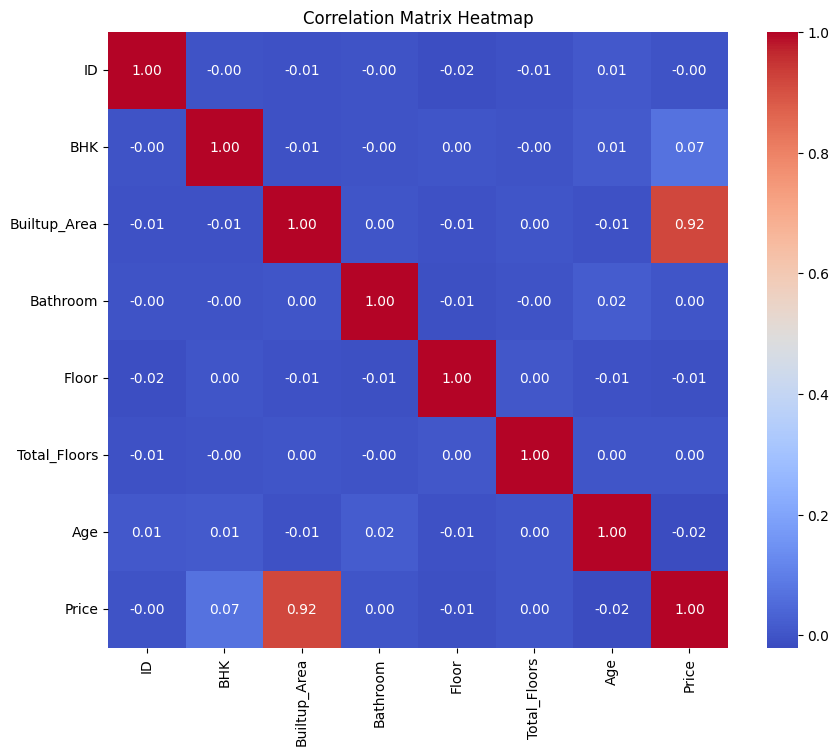

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [71]:
import pandas as pd
import numpy as np

# Select only numerical columns for correlation matrix
numerical_cols = main.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
correlation_matrix = main[numerical_cols].corr()

# Display the correlation matrix
print(correlation_matrix)

                ID   BHK  Builtup_Area  Bathroom  Floor  Total_Floors   Age  \
ID            1.00 -0.00         -0.01     -0.00  -0.02         -0.01  0.01   
BHK          -0.00  1.00         -0.01     -0.00   0.00         -0.00  0.01   
Builtup_Area -0.01 -0.01          1.00      0.00  -0.01          0.00 -0.01   
Bathroom     -0.00 -0.00          0.00      1.00  -0.01         -0.00  0.02   
Floor        -0.02  0.00         -0.01     -0.01   1.00          0.00 -0.01   
Total_Floors -0.01 -0.00          0.00     -0.00   0.00          1.00  0.00   
Age           0.01  0.01         -0.01      0.02  -0.01          0.00  1.00   
Price        -0.00  0.07          0.92      0.00  -0.01          0.00 -0.02   

              Price  
ID            -0.00  
BHK            0.07  
Builtup_Area   0.92  
Bathroom       0.00  
Floor         -0.01  
Total_Floors   0.00  
Age           -0.02  
Price          1.00  


In [24]:
main

,ID,City,Location,Developer,Property_Type,BHK,Builtup_Area,Bathroom,Floor,Total_Floors,Age,Facing,Price
0,1,Delhi,Sector 79,Sobha,Penthouse,2,1277,3,7,15,18,North,8279328
1,2,Faridabad,Sector 150,Godrej Properties,Builder Floor,2,1754,3,6,22,18,East,12144202
2,3,Greater Noida,Sector 150,DLF,Apartment,4,2539,2,13,26,4,North,18072692
3,4,Faridabad,Indirapuram,DLF,Villa,2,545,3,21,18,9,South,4050594
4,5,Faridabad,Golf Course Road,Tata Housing,Villa,1,1977,3,9,17,3,North,17838637
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,Noida,Sector 150,ATS,Apartment,4,2569,3,11,21,10,West,18575811
11996,11997,Faridabad,Sector 76,ATS,Apartment,3,2567,2,16,20,11,West,16194107
11997,11998,Ghaziabad,Sector 76,Paras Buildtech,Builder Floor,4,3078,1,5,24,19,South,18692043
11998,11999,Faridabad,Indirapuram,Godrej Properties,Villa,2,2249,1,10,11,19,North,12847115


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
main_80, main_20=train_test_split(main, test_size=0.2, random_state=42)

main_20.to_csv('main_20',index=False)

In [27]:
main_80

,ID,City,Location,Developer,Property_Type,BHK,Builtup_Area,Bathroom,Floor,Total_Floors,Age,Facing,Price
4072,4073,Gurgaon,Sector 137,Emaar India,Builder Floor,3,2273,2,19,14,15,North,14316299
7586,7587,Gurgaon,Indirapuram,Sobha,Studio,2,1183,2,23,19,2,South,6725708
8126,8127,Ghaziabad,Indirapuram,M3M,Studio,2,2918,1,1,25,7,East,16429551
8980,8981,Delhi,Rohini Sector 24,Tata Housing,Builder Floor,4,1721,3,13,9,10,West,10647478
8755,8756,Gurgaon,Indirapuram,Emaar India,Studio,1,2584,1,24,20,3,East,13772797
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11333,11334,Noida,Sector 76,Paras Buildtech,Studio,3,782,2,23,28,3,West,5714955
5209,5210,Faridabad,Indirapuram,Godrej Properties,Studio,3,2018,1,14,10,4,South,12240149
5409,5410,Delhi,Sector 62,ACE Group,Builder Floor,4,1991,2,21,16,15,North,13744516
862,863,Noida,Indirapuram,Tata Housing,Builder Floor,2,3440,1,12,16,12,North,18859793


In [28]:
main_20

,ID,City,Location,Developer,Property_Type,BHK,Builtup_Area,Bathroom,Floor,Total_Floors,Age,Facing,Price
3247,3248,Delhi,Golf Course Road,DLF,Builder Floor,2,546,3,11,17,3,East,6024777
11258,11259,Noida,Sector 150,ATS,Villa,3,1276,3,20,29,18,North,8989847
3764,3765,Greater Noida,Golf Course Road,Supertech,Studio,2,1647,2,15,10,9,South,15042276
358,359,Greater Noida,Indirapuram,Supertech,Villa,1,1794,2,24,15,6,West,9370528
6858,6859,Faridabad,Sector 56,Mahagun,Villa,1,638,1,22,19,19,West,5037609
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9853,9854,Gurgaon,Sector 76,ACE Group,Apartment,2,1348,3,2,26,5,West,7997429
4695,4696,Greater Noida,Sector 1 Greater Noida,DLF,Apartment,4,2858,3,16,10,11,West,15678684
2460,2461,Delhi,Dwarka Mor,Tata Housing,Builder Floor,1,2428,2,9,21,14,South,13437783
9780,9781,Faridabad,Sector 137,Mahagun,Apartment,2,2175,3,19,13,10,North,13195707


In [29]:
main_20.to_csv('main_20_price',index=False)

In [30]:
main_20.drop('Price',axis=1,inplace=True)

In [31]:
main_20.to_csv('main_20',index=False)

In [32]:
main_80.to_csv('main_80',index=False)

In [33]:
%pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00


In [68]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load data
df = pd.read_csv('/content/main_80')

# # ✅ Remove unnecessary index column if present
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Separate features and target
X = df.drop(['Price','ID','Age'], axis=1)
y = df['Price']

# Identify categorical columns (non-numeric)
cat_features = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", cat_features)

# Fill NaN values in categorical columns with a placeholder
for col in cat_features:
    X[col] = X[col].fillna('Unknown')


# Create CatBoost Pool (handles categorical columns automatically)
train_pool = Pool(data=X, label=y, cat_features=cat_features)

# Initialize and train CatBoost model
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.03,
    depth=9,
    loss_function='RMSE', # RMSE is suitable for log-transformed target
    random_seed=42,
    verbose=200
)

model.fit(train_pool)

# Save model
model.save_model('catboost_main_model.cbm')
print("✅ Model trained successfully and saved!")

print("Numeric features used:", X.select_dtypes(include=[np.number]).columns.tolist())

Categorical features: ['City', 'Location', 'Developer', 'Property_Type', 'Facing']
0:	learn: 5383073.2726529	total: 50.1ms	remaining: 50.1s
200:	learn: 600622.3963157	total: 8.35s	remaining: 33.2s
400:	learn: 462607.0252344	total: 13.3s	remaining: 19.9s
600:	learn: 407473.1900476	total: 20s	remaining: 13.3s
800:	learn: 371727.2606368	total: 25.1s	remaining: 6.25s
999:	learn: 344226.9465762	total: 30.8s	remaining: 0us
✅ Model trained successfully and saved!
Numeric features used: ['BHK', 'Builtup_Area', 'Bathroom', 'Floor', 'Total_Floors']


In [69]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool

# Paths (adjust if your filenames differ)
train_path = '/content/main_80'
test_path = '/content/main_20'
model_path = '/content/catboost_main_model.cbm'

# Load training data to get schema
train_df = pd.read_csv(train_path)
expected_features = [c for c in train_df.columns if c != 'Price']

# Detect categorical columns from training data
cat_features = train_df[expected_features].select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", cat_features)

# Load trained CatBoost model
model = CatBoostRegressor()
model.load_model(model_path)

# Load test data (without price)
test_df = pd.read_csv(test_path).copy()

# Make sure the test data has same columns as training data
for col in expected_features:
    if col not in test_df.columns:
        test_df[col] = np.nan

# Reorder columns to match training
X_test = test_df[expected_features]

# Convert categorical features to string type
for c in cat_features:
    X_test[c] = X_test[c].astype(str)

# Create Pool for CatBoost
test_pool = Pool(data=X_test, cat_features=cat_features)

# Predict prices
predictions = model.predict(test_pool)

# Add predictions to your test dataframe
test_df['PREDICTED_Price'] = predictions

# Save new CSV with predictions
output_path = '/content/main_20_with_predicted_price.csv'
test_df.to_csv(output_path, index=False)

print("✅ Prediction complete! File saved as:", output_path)

# Display predictions in full number format
pd.options.display.float_format = '{:.2f}'.format

display(test_df[['PREDICTED_Price']].head())




Categorical features: ['City', 'Location', 'Developer', 'Property_Type', 'Facing']
✅ Prediction complete! File saved as: /content/main_20_with_predicted_price.csv


,PREDICTED_Price
0,5374554.05
1,9404776.52
2,14709029.24
3,9552808.53
4,4769557.67


In [70]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Paths (adjust if needed)
pred_path = '/content/main_20_with_predicted_price.csv'
actual_path = '/content/main_20_price'

# Load both CSVs
pred_df = pd.read_csv(pred_path)
actual_df = pd.read_csv(actual_path)

# Merge on common columns (like property ID or other shared keys)
# If both files have identical row order, you can merge by index instead
combined = pd.merge(actual_df, pred_df[['ID', 'PREDICTED_Price']], on='ID', how='inner')

# Calculate metrics
r2 = r2_score(combined['Price'], combined['PREDICTED_Price'])
rmse = np.sqrt(mean_squared_error(combined['Price'], combined['PREDICTED_Price']))

print(f"R-squared (Accuracy): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")

# Optional: display first few comparisons
comparison = combined[['Price', 'PREDICTED_Price']].head(10)
print("\nSample comparison:")
print(comparison)





R-squared (Accuracy): 0.9951
Root Mean Squared Error (RMSE): 389,790.30

Sample comparison:
      Price  PREDICTED_Price
0   6024777       5374554.05
1   8989847       9404776.52
2  15042276      14709029.24
3   9370528       9552808.53
4   5037609       4769557.67
5  14234584      14389229.77
6  15476637      15689405.17
7  10166361       9531701.37
8  10004399       9550530.77
9  10647261      10717745.81


#Delhi House Data

In [440]:
file_path='/content/Delhi_v2.csv'
Delhi=pd.read_csv(file_path)

In [441]:
Delhi

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.00,"Noida Extension, Noida, Delhi NCR",1350.00,28.61,77.46,3.00,3.00,NaN,Under Construction,New Property,NaN,NaN,2.00,NaN,Flat,\n\n\n Welcome ...,4148.15
1,1,8800000.00,"Sector 79, Gurgaon, Delhi NCR",1490.00,28.37,76.95,3.00,3.00,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.00,NaN,Flat,\n\n\n Mapsko M...,5906.04
2,2,16500000.00,"Vaishali, Ghaziabad, Delhi NCR",2385.00,28.65,77.39,4.00,5.00,NaN,Ready to Move,New Property,1.00,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.24
3,3,3810000.00,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.00,28.57,77.44,2.00,2.00,3.00,NaN,New Property,1.00,Unfurnished,2.00,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.57
4,4,6200000.00,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.00,28.52,77.36,2.00,2.00,3.00,Ready to Move,Resale,1.00,NaN,3.00,NaN,Flat,\n\n\n The prop...,4592.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7733,7733,7900000.00,"Indirapuram, Ghaziabad, Delhi NCR",1095.00,28.64,77.37,2.00,2.00,NaN,Ready to Move,Resale,NaN,NaN,NaN,NaN,Flat,\n \n \n...,7214.61
7734,7734,4510000.00,"Greater Noida, Sector 2, Greater Noida, Delhi NCR",1060.00,28.58,77.45,2.00,2.00,3.00,NaN,Resale,NaN,Semi-Furnished,NaN,ek murti chowk,Flat,\n \n \n...,4254.72
7735,7735,7000000.00,"Crossings Republik, Ghaziabad, Delhi NCR",1898.00,28.63,77.44,4.00,3.00,5.00,Ready to Move,Resale,NaN,NaN,NaN,NaN,Flat,\n \n \n...,3688.09
7736,7736,6500000.00,"Raj Nagar Extension, Ghaziabad, Raj Nagar Exte...",1400.00,28.70,77.43,3.00,3.00,2.00,Ready to Move,Resale,1.00,NaN,3.00,vvip mall,Flat,\n \n \n...,4642.86


In [442]:
Delhi.isna().sum()

,0
Unnamed: 0,0
price,0
Address,0
area,0
latitude,0
longitude,0
Bedrooms,0
Bathrooms,0
Balcony,2572
Status,574


In [443]:
Delhi.drop(['Status','parking','Furnished_status','Lift','Landmarks','desc','Unnamed: 0'],axis=1,inplace=True)

In [444]:
Delhi.isna().sum()

,0
price,0
Address,0
area,0
latitude,0
longitude,0
Bedrooms,0
Bathrooms,0
Balcony,2572
neworold,0
type_of_building,0


In [445]:
Delhi.dropna(subset=['Balcony'],inplace=True)

In [446]:
Delhi.rename(columns={'neworold': 'Property'},inplace=True)

In [447]:
Delhi['price'].min()

1700000.0

In [448]:
Delhi.isna().sum()

,0
price,0
Address,0
area,0
latitude,0
longitude,0
Bedrooms,0
Bathrooms,0
Balcony,0
Property,0
type_of_building,0


In [449]:
Delhi['price'].mean()

np.float64(8744721.2543554)

In [450]:
# Function to calculate outliers using IQR
def count_outliers_iqr(df, column):
    Q1 = Delhi[column].quantile(0.25)
    Q3 = Delhi[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = Delhi[(Delhi[column] < lower_bound) | (Delhi[column] > upper_bound)]
    return len(outliers)

# Count outliers for 'REG_FEE' and 'SALES_PRICE'
outliers_Price = count_outliers_iqr(Delhi, 'price')

print(f"Number of outliers in 'Price': {outliers_Price}")


Number of outliers in 'Price': 371


In [452]:
# Remove outliers for 'Price' using IQR
Q1_Price = Delhi['price'].quantile(0.25)
Q3_Price= Delhi['price'].quantile(0.75)
IQR_Price = Q3_Price - Q1_Price
lower_bound_Price = Q1_Price - 1.5 * IQR_Price
upper_bound_Price = Q3_Price + 1.5 * IQR_Price

Delhi = Delhi[(Delhi['price'] >= lower_bound_Price) & (Delhi['price'] <= upper_bound_Price)]

# Verify the number of outliers in 'Price' after removal
outliers_Delhi_cleaned = count_outliers_iqr(Delhi, 'price')

print(f"Number of outliers in 'Price' after removal: {outliers_Delhi_cleaned}")

Number of outliers in 'Price' after removal: 60


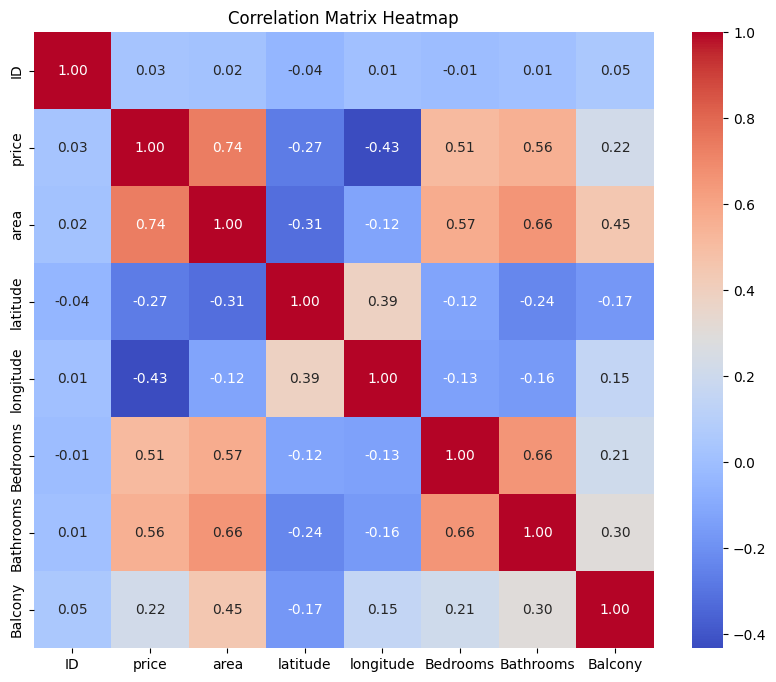

In [453]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [454]:
import pandas as pd
import numpy as np

# Select only numerical columns for correlation matrix
numerical_cols = Delhi.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
correlation_matrix = Delhi[numerical_cols].corr()

# Display the correlation matrix
print(correlation_matrix)

            price  area  latitude  longitude  Bedrooms  Bathrooms  Balcony  \
price        1.00  0.74     -0.27      -0.43      0.51       0.56     0.22   
area         0.74  1.00     -0.31      -0.12      0.57       0.66     0.45   
latitude    -0.27 -0.31      1.00       0.39     -0.12      -0.24    -0.17   
longitude   -0.43 -0.12      0.39       1.00     -0.13      -0.16     0.15   
Bedrooms     0.51  0.57     -0.12      -0.13      1.00       0.66     0.21   
Bathrooms    0.56  0.66     -0.24      -0.16      0.66       1.00     0.30   
Balcony      0.22  0.45     -0.17       0.15      0.21       0.30     1.00   
Price_sqft   0.70  0.08     -0.07      -0.49      0.21       0.18    -0.11   

            Price_sqft  
price             0.70  
area              0.08  
latitude         -0.07  
longitude        -0.49  
Bedrooms          0.21  
Bathrooms         0.18  
Balcony          -0.11  
Price_sqft        1.00  


In [455]:
Delhi['price'].max()

16000000.0

In [456]:
Delhi['Property'].unique()

array(['New Property', 'Resale'], dtype=object)

In [457]:
Delhi.drop('Price_sqft',axis=1,inplace=True)

In [458]:
Delhi['type_of_building'].unique()

array(['Flat', 'Individual House'], dtype=object)

In [459]:
Delhi['ID'] = range(1, len(Delhi) + 1)
Delhi.head()

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Property,type_of_building,ID
3,3810000.00,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.00,28.57,77.44,2.00,2.00,3.00,New Property,Flat,1
4,6200000.00,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.00,28.52,77.36,2.00,2.00,3.00,Resale,Flat,2
5,3700000.00,"tower 2, 6th floor, Crossings Republik, Ghazia...",1150.00,28.63,77.44,2.00,2.00,3.00,New Property,Flat,3
6,3270000.00,"Nirala Aspire, GH03, Sector 16C, Hundal, Great...",890.00,28.61,77.46,2.00,2.00,3.00,Resale,Flat,4
7,3990000.00,"Suncity Avenue 102, Sector 102, Gurgaon Bang o...",850.00,28.47,76.97,2.00,2.00,1.00,Resale,Flat,5


In [460]:
cols = Delhi.columns.tolist()
cols.remove('ID')
Delhi = Delhi[['ID'] + cols]
Delhi.head()

,ID,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Property,type_of_building
3,1,3810000.00,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.00,28.57,77.44,2.00,2.00,3.00,New Property,Flat
4,2,6200000.00,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.00,28.52,77.36,2.00,2.00,3.00,Resale,Flat
5,3,3700000.00,"tower 2, 6th floor, Crossings Republik, Ghazia...",1150.00,28.63,77.44,2.00,2.00,3.00,New Property,Flat
6,4,3270000.00,"Nirala Aspire, GH03, Sector 16C, Hundal, Great...",890.00,28.61,77.46,2.00,2.00,3.00,Resale,Flat
7,5,3990000.00,"Suncity Avenue 102, Sector 102, Gurgaon Bang o...",850.00,28.47,76.97,2.00,2.00,1.00,Resale,Flat


In [461]:
Delhi_80, Delhi_20=train_test_split(Delhi, test_size=0.2, random_state=42)
Delhi_20.to_csv('Delhi_20_Price',index=False)

In [462]:
Delhi_80.to_csv('Delhi_80',index=False)

In [463]:
Delhi_20.drop('price',axis=1,inplace=True)

In [464]:
Delhi_20.to_csv('Delhi_20_without_price',index=False)

In [465]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load data
df = pd.read_csv('/content/Delhi_80')

# # ✅ Remove unnecessary index column if present
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Separate features and target
X = df.drop(['price','ID','Address'], axis=1)
y = df['price']

# Identify categorical columns (non-numeric)
cat_features = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", cat_features)

# Fill NaN values in categorical columns with a placeholder
for col in cat_features:
    X[col] = X[col].fillna('Unknown')


# Create CatBoost Pool (handles categorical columns automatically)
train_pool = Pool(data=X, label=y, cat_features=cat_features)

# Initialize and train CatBoost model
model = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.05,
    depth=7,
    loss_function='RMSE', # RMSE is suitable for log-transformed target
    random_seed=42,
    verbose=200
)

model.fit(train_pool)

# Save model
model.save_model('catboost_main_model.cbm')
print("✅ Model trained successfully and saved!")

print("Numeric features used:", X.select_dtypes(include=[np.number]).columns.tolist())

Categorical features: ['Property', 'type_of_building']
0:	learn: 3193621.1582174	total: 17.1ms	remaining: 34.3s
200:	learn: 1119245.6892844	total: 771ms	remaining: 6.9s
400:	learn: 953377.7437037	total: 1.85s	remaining: 7.39s
600:	learn: 850011.2512649	total: 2.81s	remaining: 6.53s
800:	learn: 774626.4017919	total: 3.26s	remaining: 4.88s
1000:	learn: 715298.2276629	total: 3.74s	remaining: 3.74s
1200:	learn: 667491.0137086	total: 4.21s	remaining: 2.8s
1400:	learn: 626302.2792161	total: 4.68s	remaining: 2s
1600:	learn: 590888.7106396	total: 5.15s	remaining: 1.28s
1800:	learn: 560488.3387156	total: 5.64s	remaining: 623ms
1999:	learn: 534462.6307942	total: 6.11s	remaining: 0us
✅ Model trained successfully and saved!
Numeric features used: ['area', 'latitude', 'longitude', 'Bedrooms', 'Bathrooms', 'Balcony']


In [466]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool

# Paths (adjust if your filenames differ)
train_path = '/content/Delhi_80'
test_path = '/content/Delhi_20_without_price'
model_path = '/content/catboost_main_model.cbm'

# Load training data to get schema
train_df = pd.read_csv(train_path)
expected_features = [c for c in train_df.columns if c != 'Price']

# Detect categorical columns from training data
cat_features = train_df[expected_features].select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", cat_features)

# Load trained CatBoost model
model = CatBoostRegressor()
model.load_model(model_path)

# Load test data (without price)
test_df = pd.read_csv(test_path).copy()

# Make sure the test data has same columns as training data
for col in expected_features:
    if col not in test_df.columns:
        test_df[col] = np.nan

# Reorder columns to match training
X_test = test_df[expected_features]

# Convert categorical features to string type
for c in cat_features:
    X_test[c] = X_test[c].astype(str)

# Create Pool for CatBoost
test_pool = Pool(data=X_test, cat_features=cat_features)

# Predict prices
predictions = model.predict(test_pool)

# Add predictions to your test dataframe
test_df['PREDICTED_Price'] = predictions

# Save new CSV with predictions
output_path = '/content/Delhi_20_with_predicted_price.csv'
test_df.to_csv(output_path, index=False)

print("✅ Prediction complete! File saved as:", output_path)

# Display predictions in full number format
pd.options.display.float_format = '{:.2f}'.format

display(test_df[['PREDICTED_Price']].head())




Categorical features: ['Address', 'Property', 'type_of_building']
✅ Prediction complete! File saved as: /content/Delhi_20_with_predicted_price.csv


,PREDICTED_Price
0,4721603.02
1,3343662.90
2,8757096.77
3,11691881.34
4,3328853.88


In [467]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Paths (adjust if needed)
pred_path = '/content/Delhi_20_with_predicted_price.csv'
actual_path = '/content/Delhi_20_Price'

# Load both CSVs
pred_df = pd.read_csv(pred_path)
actual_df = pd.read_csv(actual_path)

# Merge on common columns (like property ID or other shared keys)
# If both files have identical row order, you can merge by index instead
combined = pd.merge(actual_df, pred_df[['ID', 'PREDICTED_Price']], on='ID', how='inner')

# Calculate metrics
r2 = r2_score(combined['price'], combined['PREDICTED_Price'])
rmse = np.sqrt(mean_squared_error(combined['price'], combined['PREDICTED_Price']))

print(f"R-squared (Accuracy): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")

# Optional: display first few comparisons
comparison = combined[['price', 'PREDICTED_Price']].head(10)
print("\nSample comparison:")
print(comparison)





R-squared (Accuracy): 0.8950
Root Mean Squared Error (RMSE): 1,096,213.61

Sample comparison:
        price  PREDICTED_Price
0  4800000.00       4721603.02
1  3500000.00       3343662.90
2  7900000.00       8757096.77
3 11000000.00      11691881.34
4  4000000.00       3328853.88
5  4200000.00       3192251.70
6  4750000.00       3619609.23
7  9500000.00      10911780.46
8  3400000.00       3061230.84
9  5500000.00       6877741.07
